In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from scipy.ndimage import convolve


# Homework 2

Homework 2 will cover materials from chapter 3 (histogram based analysis) and 4 (convolution).

Ideally, computational, analytical, and written parts can be submitted as part of this jupyter notebook.

Homework should be submitted by email, to dtward@mednet.ucla.edu.

Conding parts can be submitted as part of the notebook, using as many cells as is convenient.

Analytical parts should be submitted with math rendered using Latex in markdown cells, using as many cells as is convenient.

Written parts can use markdown cells.

If you do not know how to type equations in Latex, and cannot work out enough of the basics using the equations provided here, please email me and we'll work something out.

There is lots of exposition in this homework assignment.  All the problems that need to be solved are labeld with the the title "Problem".

Homework will be due on Tuesday February 18.

## Grading guidlines

I try to grade as reproducibly as possible by avoiding "fine grained" grades, and only using a few values.

Each problem presented below will be given equal weight (unless otherwise specified).  And I will grade them in the following manner

1: The work was perfect or had very minor flaws

2/3: The work had some nontrivial errors

1/3: The work had many errors, was not finished, or demonstrated a lack of understanding.

0: The work was not done at all, or showed an unambiguous lack of effort.

The final grade will be the average grade of all the problems (or weighted average if specified).

Note that if your code does not work, this does not mean you will get a 0.  I will read the code, not just look at the outputs.  But, I would encourage you to ask me questions so that you can turn in working code.  If anyone is unhappy with my grading, please email me.

## Part 1: Histograms


### 1.1 The Komogorov-Smirnov distance

The KS distance between two densities is defined as the maximum of the distance between their CDFs.

If $f_0,f_1$ are two probability densities, with $F_0,F_1$ their corresponding CDFs, the KS distance is defined as
\begin{align}
\max_t |F_0(t) - F_0(t)|
\end{align}

The KS distance is often used in nonparametric statistical testing, because it makes no assumptions about the distribution of our data.  This is in contrast to (for example) the t-test, which assumes our data is Gaussian.

### Problem 1.1.1

Load the datasets Istack0.npy (erythroblasts) and Istack1.npy (lymphocytes).

Save the first two images from Istack0, and the first image from Istack1.

Compute CDFs for all these images, sampled on 101 bin edges linearly spaced between -0.1 and 1.1.

You can use the built in matplotlib function, cdfI,bins,containers = plt.hist(...), specifying appropriate bins, and specifying cumulative=True and density=True, but the visualization this produces by default will "not beautiful".

Create a line plot of the bin centers versus the three cdfs on the same axes.

Text(0.5, 1.0, 'Lymphocyte 0')

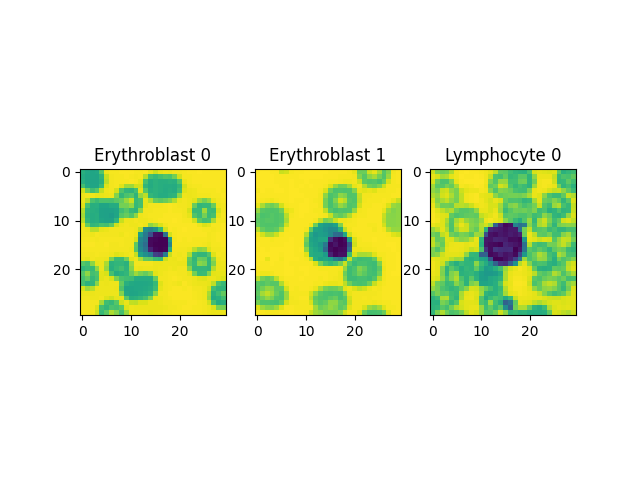

In [2]:
Istack0 = np.load('Istack0.npy')
Istack1 = np.load('Istack1.npy')

# save three images
I = Istack0[0]/255.0
J = Istack0[1]/255.0
K = Istack1[0]/255.0

# visualize
fig,ax = plt.subplots(1,3)
ax[0].imshow(I)
ax[0].set_title('Erythroblast 0')
ax[1].imshow(J)
ax[1].set_title('Erythroblast 1')
ax[2].imshow(K)
ax[2].set_title('Lymphocyte 0')

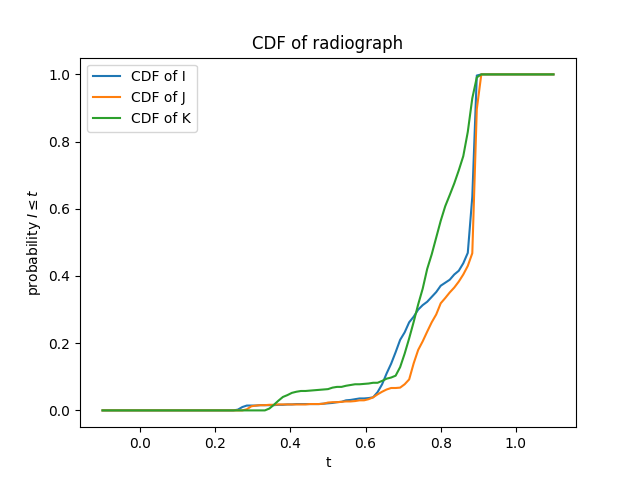

In [3]:
# your code here
t = np.linspace(-0.1,1.1,101)
cdf_i = np.zeros_like(t)
cdf_j = np.zeros_like(t)
cdf_k = np.zeros_like(t)
N = I.size
for i in I.ravel():
    cdf_i += (i <= t)/N # step function
N = J.size
for i in J.ravel():
    cdf_j += (i <= t)/N # step function
N = K.size
for i in K.ravel():
    cdf_k += (i <= t)/N # step function
fig,ax = plt.subplots()
ax.plot(t, cdf_i, label="CDF of I")
ax.plot(t, cdf_j, label="CDF of J")
ax.plot(t, cdf_k, label="CDF of K")
ax.set_title('CDF of radiograph')
ax.set_xlabel('t')
ax.set_ylabel('probability $I \leq t$')
ax.legend()

### Problem 1.1.2

Compute the KS distance between the two CDFs of erythroblasts.  

Then compute the average of the KS distances between the erythroblasts and the lymphoctye.

Is the "within group distance"  bigger than the average "between group distance"?

In [4]:
e0_vs_e1 = max(abs(cdf_i - cdf_j))
print("Within group distance:", e0_vs_e1)

e0_vs_l = max(abs(cdf_i - cdf_k))
e1_vs_l = max(abs(cdf_j - cdf_k))

avg_e_vs_l = (e0_vs_l + e1_vs_l)/2
print("Between group distance:", avg_e_vs_l)

Within group distance: 0.1700000000000007
Between group distance: 0.41055555555553924


The within group distance is smaller than the average between group distance as 0.17 is less than 0.41

## Part 2: Thresholding

We will extend the thresholding algorithms discussed in class to 3 categories instead of just foreground and background.

### Problem 2.1.1

Load the file coronal_mri.npy.  

By copying the Gaussian mixture modeling code already provided in class, and changing the mu, sigma2, and pi parameters to have length 3, and have appropriate values, try to separate the MR image into cerebrospinal fluid+background, gray matter, and white matter.

Compute the class with maximum probability at each pixel.  Visualize the results by displaying an integer valued image with 0=CSF, 1=gray matter, and 2=white matter.



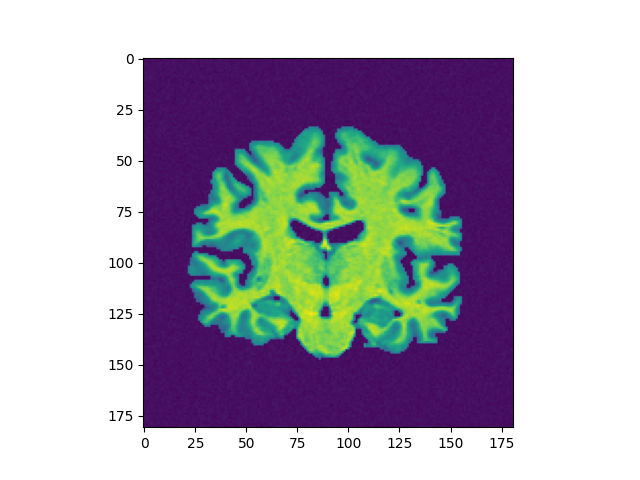

In [36]:
I = np.load('coronal_mri.npy')
fig,ax = plt.subplots()
ax.imshow(I)

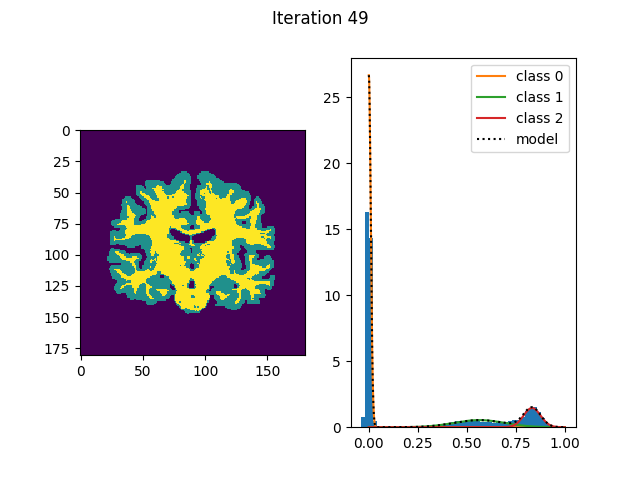

In [37]:
# copy and modify GMM code here
# now em algorithm
mu = np.array([0.05,0.5,0.85])
sigma2 = np.array([0.3,0.3,0.3])
pi = np.array([1/3,1/3,1/3])
k = len(mu)

# define a gaussian function
def phi(t,mu,sigma2):
    return np.exp(-(t[None]-mu)**2/2/sigma2)/np.sqrt(2.0*np.pi*sigma2)

# a domain for plotting
t = np.linspace(0,1,1000)

fig,ax = plt.subplots(1,2)

fig_list = []

itermax = 50
for it in range(itermax):
    # calculate the class probabilities
    c_ = np.exp(-(I[None,:,:]-mu[:,None,None])**2/2/sigma2[:,None,None])/np.sqrt(2.0*np.pi*sigma2[:,None,None])
    # make sure it is properly normalized by dividing by the sum
    c = pi[:,None,None]*c_ / np.sum(pi[:,None,None]*c_,0,keepdims=True)
    
    # update the parameters
    # weights
    w = np.sum(c,(-1,-2))    
    # heights
    pi = w/np.sum(w)
    # means
    mu = np.sum(I*c,(-1,-2))/w
    # variances
    sigma2 = np.sum((I[None,:,:]-mu[:,None,None])**2*c,(-1,-2))/w
    
# let's draw
ax[0].cla()
max_class = np.argmax(c, axis=0)
im = ax[0].imshow(max_class, interpolation='none', vmin=0, vmax=2)
ax[1].cla()
ax[1].hist(I.ravel(),50,density=True)        
p = t*0
for i in range(k):        
    gaussian = pi[i]*phi(t,mu[i],sigma2[i])[0]
    ax[1].plot(t,gaussian,label=f'class {i}')
    p += gaussian
ax[1].plot(t,p,':k',label=f'model')
ax[1].legend()
fig.suptitle(f'Iteration {it}')

fig.canvas.draw()

## Part 3: Gradient descent


### 3.1 Denoising
Because noise tends to be uncorrelated from one pixel to another, we expect the gradient of an image to have a large magnitude where there is lots of noise, and a small magnitude where there is little noise.  Given a noisy image $J(x)$, a standard approach to denoising is to find an image $I(x)$ that minimizes the loss function

\begin{align}
I^*(x) = \arg\min_I E(I) = \arg\min_I \int |I(x) - J(x)|^2 + \gamma |\nabla I(x)|^2dx
\end{align}

Here $\gamma$ is a parameter that controls the tradoff between fidelity ($I$ should be close to $J$), and noise level ($I$ should have a small derivative).

We can compute the derivative by taking a perturbation $I \mapsto I + \epsilon \delta I$, and taking the derivative with respect to $\epsilon$
\begin{align}
&\frac{d}{d\epsilon } E(I + \epsilon \delta I ) \\
&= \int |I(x) + \epsilon \delta I(x) - J(x)|^2 + \gamma |\nabla [I(x) + \epsilon \delta I(x)]|^2dx \big|_{\epsilon = 0}\\
&=\int 2(I(x) - J(x)) \delta I(x) + 2\gamma  \nabla I(x)^T \nabla \delta (x) dx\\
&= \int 2(I(x) - J(x)) \delta I(x) - 2\gamma  [\text{div} (\nabla I(x))] \delta I(x) dx
\end{align}
In the last line we applied the divergence theorem, assuming that boundary conditions are 0.  Note that $\text{div} \nabla I(x) = \Delta I(x)$, the Laplacian of I(x).

We can factor out the perturbation to determine the gradient
\begin{align}
&=  \int 2 \left( (I(x) - J(x))  - \gamma \Delta I(x) \right) \delta I(x) dx
\end{align}

The gradient is the term that multiplies the perturbation.
\begin{align}
\nabla E(I) = 2[(I - J) - \gamma \Delta I]
\end{align}


### Problem 3.1.1

Build a gradient descent algorithm to remove noise from an image.  Note you can calculate the discrete Laplacian by convolution with the filter 
\begin{align}
\begin{pmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{pmatrix}
\end{align}

In this problem we will assume the pixel size is 1, so integrals are approximated by sums.

Text(0.5, 1.0, 'Noisy image')

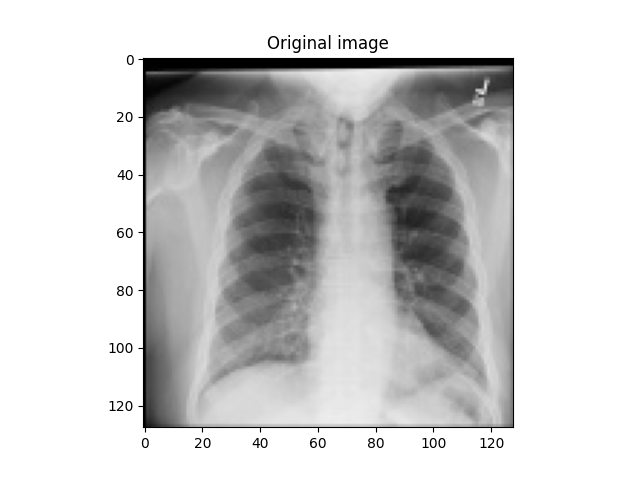

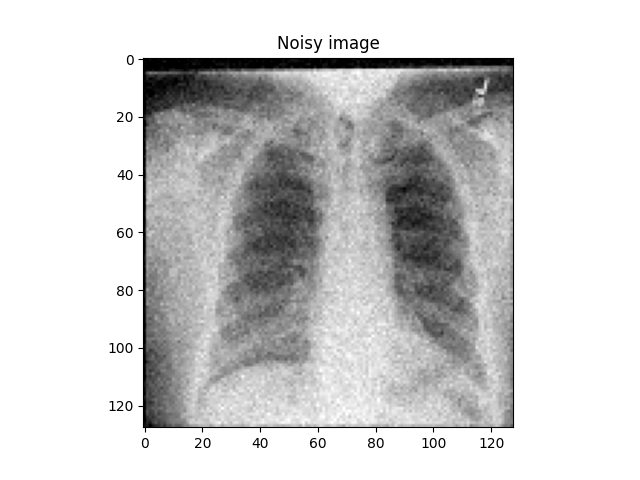

In [7]:
J0 = np.load('chest.npy')
J0 = J0/255.0
fig,ax = plt.subplots()
ax.imshow(J0,cmap='gray',vmin=0,vmax=1)
ax.set_title('Original image')

J = J0 + np.random.randn(*J0.shape)*0.05
fig,ax = plt.subplots()
ax.imshow(J,cmap='gray',vmin=0,vmax=1)
ax.set_title('Noisy image')

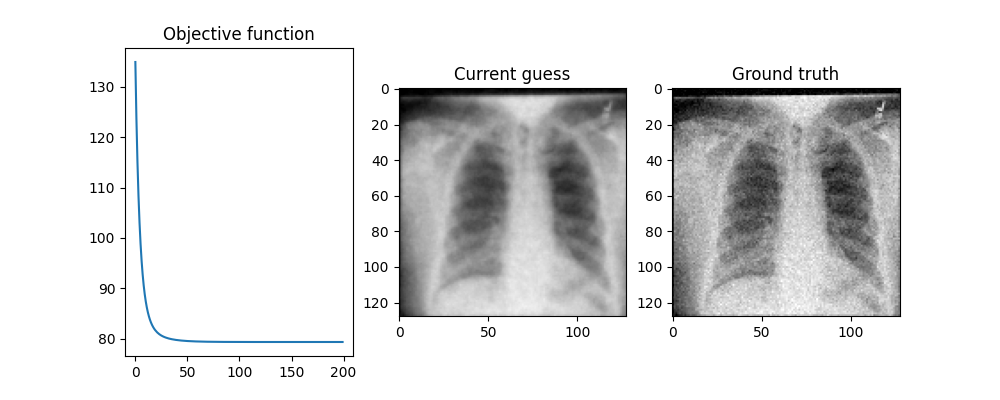

In [8]:
# initialize some parameters
niter = 200
ep = 1e-2
gamma = 1e-0

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)

# convolution kernel to compute the discrete Laplacian
k = np.array([[0.0,1.0,0.0],
             [1.0,-4.0,1.0],
             [0.0,1.0,0.0]])

fig,ax = plt.subplots(1,3,figsize=(10,4))
for it in range(niter):
    
    # calculate derivative
    I_0,I_1 = np.gradient(I)
    
    # calculate objective function
    E = np.sum((I - J) ** 2 + gamma * (I_0 ** 2 + I_1 ** 2))  # ... your code here
    Esave.append(E)
    
    # calculate Laplacian
    DeltaI = convolve(I, k)# ... your code here
    
    # calculate gradient
    gradient = 2*((I - J) - gamma * DeltaI)# ... your code here
    
    
    # update
    I = I - ep*gradient
    
    
    # draw
    if not it%10 or it == niter-1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I,cmap='gray',vmin=0,vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J,cmap='gray',vmin=0,vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()

## 3.2 A nonlinear approach

The previous approach tends to blur strong edges in an image, in addition to removing noise.

One can preserve edges by using a weaker penalty $\gamma (|\nabla I|^{2})^p$ for $\frac12 < p < 1$.

Consider the loss function
\begin{align}
E(I) &= \int |I(x) - J(x)|^2 + \gamma (|\nabla I(x) |^2|)^p dx
\end{align}

Note that when $p=0.5$ this loss function is not differentiable, and a different optimization technique would be required to solve the problem.



### Problem 3.2.1


By applying the chain rule, and following the example above, show that the gradient of this objective function with respect to $I$ is given by
\begin{align}
2(I(x) - J(x))  -2p\gamma  \text{div} \left[(|\nabla I(x)|^2)^{p-1}  \nabla I\right]
\end{align}


Your work here
\begin{align}
&\frac{d}{d\epsilon}  \int |I(x)  + \epsilon \delta I(x)  - J(x)|^2 + \gamma [|\nabla I(x) + \epsilon \nabla \delta I(x) |^2]^pdx  \bigg|_{\epsilon = 0}\\
&=\int 2(I(x) + 0 - J(x)) \cdot \delta I(x)  + p\gamma [|\nabla I(x) + 0 |]^{2(p-1)} \cdot  2(\nabla I(x) \cdot \nabla \delta I(x))dx\\
&= \int 2(I(x) - J(x)) \cdot \delta I(x)  + 2p\gamma [|\nabla I(x)|]^{2(p-1)}(\nabla I(x) \cdot \nabla \delta I(x))dx\\
\\ & \text{Using} \int(\nabla I \cdot \nabla \delta I) dx = - \int \text{div} \left[(|\nabla I(x)|^2)^{p-1}\nabla I\right]dx \text{ for integration by parts}\\ \\
&= \int 2(I(x) - J(x)) \cdot \delta I(x)  - 2p\gamma\text{div} \left[(|\nabla I(x)|^2)^{p-1}  \nabla I\right]dx \cdot \nabla \delta I(x)\\
&= \int [2(I(x) - J(x)) - 2p\gamma\text{div} \left((|\nabla I(x)|^2)^{p-1}  \nabla I\right)] \cdot \nabla \delta I(x)dx\\
&= \int \text{GRADIENT}(x)  \delta I(x) dx
\end{align}

### Problem 3.2.2

Build a gradient descent algorithm to remove noise from an image using the above objective function, and the same assumptions as problem 3.2.1.

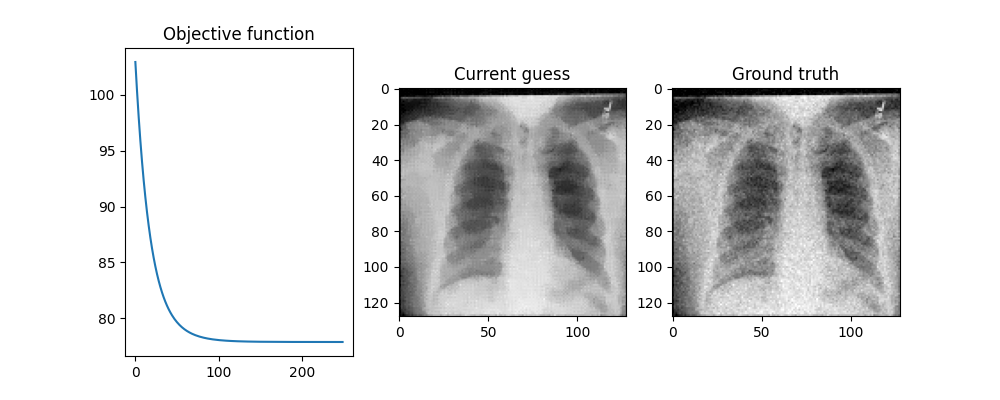

In [9]:
# initialize some parameters
niter = 250
ep = 1e-2
gamma = 1e-1
p = 0.51

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)


fig,ax = plt.subplots(1,3,figsize=(10,4))
for it in range(niter):
    
    # calculate derivative
    I_0,I_1 = np.gradient(I)
    
    # calculate objective function
    E = np.sum((I - J) ** 2 + gamma * (I_0 ** 2 + I_1 ** 2)**p) # ... your code here
    Esave.append(E)
    
    # calculate the norm squared of the gradient
    norm2dI = I_0 ** 2 + I_1 ** 2 # ... your code here
    
    # raise the norm squared to the power p-1
    norm2pm1dI = norm2dI ** (p - 1)# ... your code here
    
    # multiply by the image gradient
    norm2pm1dI_times_I_0 = norm2pm1dI * I_0 # ... your code here
    norm2pm1dI_times_I_1 = norm2pm1dI * I_1 # ... your code here
    
    # compute the divergence
    div_norm2pm1dI_times_dI = np.gradient(norm2pm1dI_times_I_0,axis=0)+ np.gradient(norm2pm1dI_times_I_1,axis=1)
    
    # calculate gradient
    gradient = 2 * ((I - J) - p * gamma * div_norm2pm1dI_times_dI)# ... your code here
    
    
    # update
    I = I - ep*gradient
    
    
    # draw
    if not it%10 or it == niter-1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I,cmap='gray',vmin=0,vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J,cmap='gray',vmin=0,vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()


## Part 4: template matching


Here we will consider using template matching to detect and discriminate between cell types.



### Problem 4.1.1

Load the dataset Istack0.npy, which contains images of erythroblasts against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect erythroblasts versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

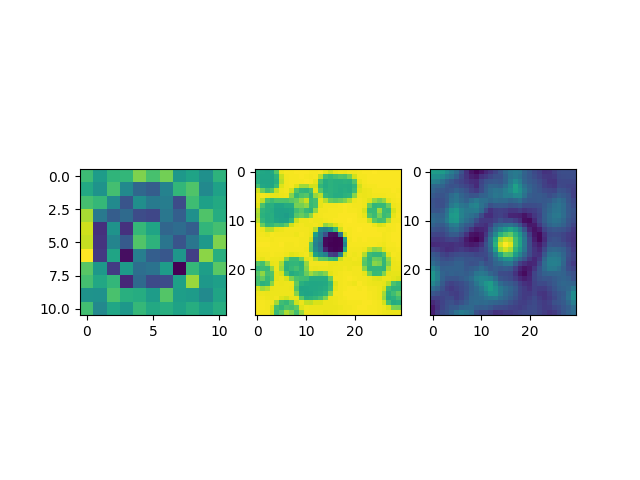

In [10]:
# your code here
Istack = np.load('Istack0.npy')

# loop through the images and calculate the mean and the mean of squares
# estimate the mean of the center, for platelet for class 1
# estimate the mean of the corner, for background class 0
# also estimate mean of square of center and corner
# variance[x] = E[x^2] - E[x]^2
# we will create a filter that is smaller than the image
# here it will be 11x1
r = 5 # gives a size of 11x1
count = 0

# initialize our guess for means and mean squares
mu1 = np.zeros((2*r+1,2*r+1))
mu0 = np.zeros((2*r+1,2*r+1))
# since we are dealing with covariance and not just variance
# need to be (11*11) x (11*11)
s20 = np.zeros(((2*r+1)**2,(2*r+1)**2))
s21 = np.zeros(((2*r+1)**2,(2*r+1)**2))

#Is = []
for i in range(len(Istack)):
    x = Istack[i]
    x = x / 255.0 # convert them to a float between 0 and 1 (instead of 8 bit between 0 and 255)
    
    
    # find the center pixel
    r0 = x.shape[0]//2 # diving the size by 2 (// means integer division)
    c0 = x.shape[1]//2
    xc = x[r0-r:r0+r+1,c0-r:c0+r+1] # use indexing to extract the center
    
    # find anything else
    # for the other class, I'll extract an 11x1 region from the corner
    xb = x[:2*r+1,:2*r+1]
    
    
    # add these regions to our guess of the mean
    mu1 += xc
    mu0 += xb
    # for our guess of the mean squared
    # column vector times row vector to get square matrix
    s20 += (xb.ravel()[:,None]@xb.ravel()[None,:])
    s21 += (xc.ravel()[:,None]@xc.ravel()[None,:])
    
    count += 1
    #if count == nestimate:
    #    break
        
    # Is.append((x*255).astype(np.uint8))
    
mu0 = mu0/count
mu1 = mu1/count
s20 = s20/count
s21 = s21/count
    
# to calculate the common covariance
# first calculate the covariance of each class
# Var[x] = E[x^2] - E[x]^2
# but, we replace "squared" with column-row products, because we look at covariance not variance
Sigma0 = s20 - (mu0.ravel()[:,None]@mu0.ravel()[None,:])
Sigma1 = s21 - (mu1.ravel()[:,None]@mu1.ravel()[None,:])
# then we combine them into a common covariance matrix
# here we have exactly the same number of samples in each class
# so just average them (add up and divide by 2)
Sigma = (Sigma0 + Sigma1)/2

# let's find the displacement for entry in our covariance matrix
# every component of Sigma corresponds to a pair (row0,row1,col0,col1)
Rows,Cols = np.meshgrid(np.arange(2*r+1),np.arange(2*r+1),indexing='ij')
ROWS0 = Rows.ravel()[:,None]@np.ones_like(Rows.ravel())[None,:]
ROWS1 = np.ones_like(Rows.ravel()[:,None])@Rows.ravel()[None,:]
Drows = ROWS0 - ROWS1 # displacement between rows at every entry in our covariance

COLS0 = Cols.ravel()[:,None]@np.ones_like(Cols.ravel())[None,:]
COLS1 = np.ones_like(Cols.ravel()[:,None])@Cols.ravel()[None,:]
Dcols = COLS0 - COLS1 # displacement between columns at every entry in our covariance matrix

# stack all these together, and find the unique ones
displacements = np.unique(np.stack((Drows,Dcols)).reshape(2,-1),axis=(-1))

# initialize a new shift invariant covariance matrix
S2disp = np.zeros_like(Sigma)
count = 0
for d in displacements.T: # loop through the unique displacements
    # find the indices in our covariance matrix that correspond to this unique displacement
    ind = (Drows==d[0])*(Dcols==d[1])
    #print(np.sum(ind))
    # take all the elements of the original covariance matrix that correspond to this displacement
    # and average them all together
    # assign the same constant value to all these indices in our new covariance matrix
    S2disp[ind] = np.mean(Sigma[ind])
    
# how about distance
# maybe our covariance is rotationally invariant and not just shift invariant
d2sall = Drows**2+Dcols**2 # displacments are converted to square distances
d2s = np.unique(d2sall) # find all the unique values
S2dist = np.zeros_like(Sigma)
for d in d2s:
    # find all the indices that correspond to this unique value
    ind = d2sall==d
    # average across these indices, and assign the same constant value to our new covariance matrix
    S2dist[ind] = np.mean(Sigma[ind])

# now let's see the performance
# start with a circle template
x = np.arange(-r,r+1) 
X = np.meshgrid(x,x,indexing='ij')
# create an 11x1 filter called h
# value 0 in background, and -1 in the foreground
# our platelet is dark on light
ind = 0 # chose the 0th image in our stack to apply our filter

# use our rotationally invariant covariance matrix
h_0 = np.linalg.solve(S2disp,(mu1-mu0).ravel()).reshape(mu1.shape)
response = convolve(Istack[ind]/255.0,h_0[::-1,::-1],)
fig,ax = plt.subplots(1,3)
ax[0].imshow(h_0)
ax[1].imshow(Istack[ind])
ax[2].imshow(response)

### Problem 4.1.2

Load the dataset Istack1.npy, which contains images of lymphocyte against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect lymphocytes versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

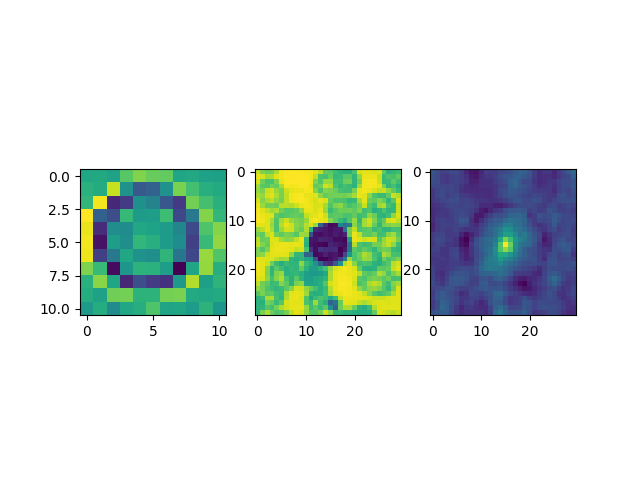

In [11]:
# your code here
Istack = np.load('Istack1.npy')

# loop through the images and calculate the mean and the mean of squares
# estimate the mean of the center, for platelet for class 1
# estimate the mean of the corner, for background class 0
# also estimate mean of square of center and corner
# variance[x] = E[x^2] - E[x]^2
# we will create a filter that is smaller than the image
# here it will be 11x1
r = 5 # gives a size of 11x1
count = 0

# initialize our guess for means and mean squares
mu1 = np.zeros((2*r+1,2*r+1))
mu0 = np.zeros((2*r+1,2*r+1))
# since we are dealing with covariance and not just variance
# need to be (11*11) x (11*11)
s20 = np.zeros(((2*r+1)**2,(2*r+1)**2))
s21 = np.zeros(((2*r+1)**2,(2*r+1)**2))

#Is = []
for i in range(len(Istack)):
    x = Istack[i]
    x = x / 255.0 # convert them to a float between 0 and 1 (instead of 8 bit between 0 and 255)
    
    
    # find the center pixel
    r0 = x.shape[0]//2 # diving the size by 2 (// means integer division)
    c0 = x.shape[1]//2
    xc = x[r0-r:r0+r+1,c0-r:c0+r+1] # use indexing to extract the center
    
    # find anything else
    # for the other class, I'll extract an 11x1 region from the corner
    xb = x[:2*r+1,:2*r+1]
    
    
    # add these regions to our guess of the mean
    mu1 += xc
    mu0 += xb
    # for our guess of the mean squared
    # column vector times row vector to get square matrix
    s20 += (xb.ravel()[:,None]@xb.ravel()[None,:])
    s21 += (xc.ravel()[:,None]@xc.ravel()[None,:])
    
    count += 1
    #if count == nestimate:
    #    break
        
    # Is.append((x*255).astype(np.uint8))
    
mu0 = mu0/count
mu1 = mu1/count
s20 = s20/count
s21 = s21/count
    
# to calculate the common covariance
# first calculate the covariance of each class
# Var[x] = E[x^2] - E[x]^2
# but, we replace "squared" with column-row products, because we look at covariance not variance
Sigma0 = s20 - (mu0.ravel()[:,None]@mu0.ravel()[None,:])
Sigma1 = s21 - (mu1.ravel()[:,None]@mu1.ravel()[None,:])
# then we combine them into a common covariance matrix
# here we have exactly the same number of samples in each class
# so just average them (add up and divide by 2)
Sigma = (Sigma0 + Sigma1)/2

# let's find the displacement for entry in our covariance matrix
# every component of Sigma corresponds to a pair (row0,row1,col0,col1)
Rows,Cols = np.meshgrid(np.arange(2*r+1),np.arange(2*r+1),indexing='ij')
ROWS0 = Rows.ravel()[:,None]@np.ones_like(Rows.ravel())[None,:]
ROWS1 = np.ones_like(Rows.ravel()[:,None])@Rows.ravel()[None,:]
Drows = ROWS0 - ROWS1 # displacement between rows at every entry in our covariance

COLS0 = Cols.ravel()[:,None]@np.ones_like(Cols.ravel())[None,:]
COLS1 = np.ones_like(Cols.ravel()[:,None])@Cols.ravel()[None,:]
Dcols = COLS0 - COLS1 # displacement between columns at every entry in our covariance matrix

# stack all these together, and find the unique ones
displacements = np.unique(np.stack((Drows,Dcols)).reshape(2,-1),axis=(-1))

# initialize a new shift invariant covariance matrix
S2disp = np.zeros_like(Sigma)
count = 0
for d in displacements.T: # loop through the unique displacements
    # find the indices in our covariance matrix that correspond to this unique displacement
    ind = (Drows==d[0])*(Dcols==d[1])
    #print(np.sum(ind))
    # take all the elements of the original covariance matrix that correspond to this displacement
    # and average them all together
    # assign the same constant value to all these indices in our new covariance matrix
    S2disp[ind] = np.mean(Sigma[ind])
    
# how about distance
# maybe our covariance is rotationally invariant and not just shift invariant
d2sall = Drows**2+Dcols**2 # displacments are converted to square distances
d2s = np.unique(d2sall) # find all the unique values
S2dist = np.zeros_like(Sigma)
for d in d2s:
    # find all the indices that correspond to this unique value
    ind = d2sall==d
    # average across these indices, and assign the same constant value to our new covariance matrix
    S2dist[ind] = np.mean(Sigma[ind])

# now let's see the performance
# start with a circle template
x = np.arange(-r,r+1) 
X = np.meshgrid(x,x,indexing='ij')
# create an 11x1 filter called h
# value 0 in background, and -1 in the foreground
# our platelet is dark on light
ind = 0 # chose the 0th image in our stack to apply our filter

# use our rotationally invariant covariance matrix
h_1 = np.linalg.solve(S2disp,(mu1-mu0).ravel()).reshape(mu1.shape)
response = convolve(Istack[ind]/255.0,h_1[::-1,::-1],)
fig,ax = plt.subplots(1,3)
ax[0].imshow(h_1)
ax[1].imshow(Istack[ind])
ax[2].imshow(response)

### Problem 4.1.2

Apply both your filters to the image containing the erythroblast and visualize the results.  Which one gives a larger response?

Next, apply both your filters to the image containing the lymphocyte and visualize the results. Which one gives a larger response?

Erythroblast using Erythroblast Filter: 27.652358114196417
Lymphocyte using Erythroblast Filter: -10.324868836555694
Erythroblast using Lymphocyte Filter: 42.53246577341601
Lymphocyte using Lymphocyte Filter: 57.851711941201835


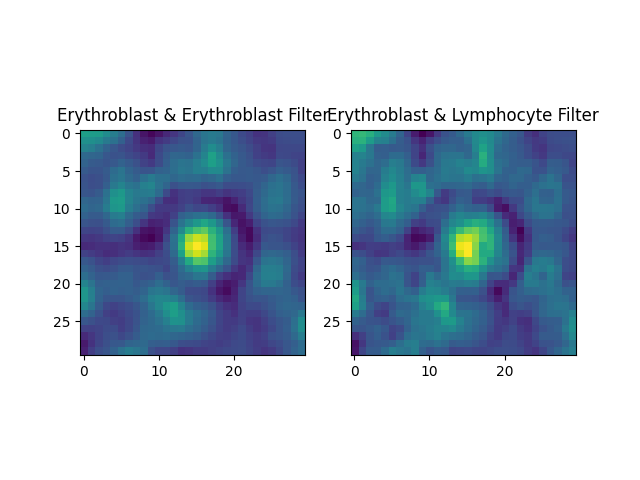

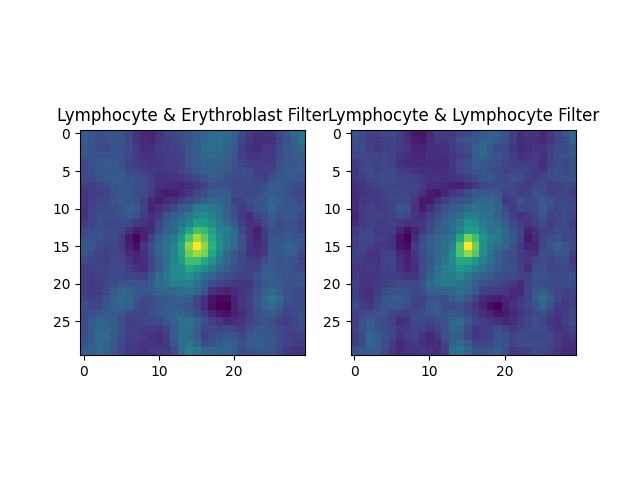

In [26]:
Istack0 = np.load('Istack0.npy')
Istack1 = np.load('Istack1.npy')

response_0 = convolve(Istack0[ind]/255.0,h_0[::-1,::-1],)
response_1 = convolve(Istack0[ind]/255.0,h_1[::-1,::-1],)
fig,ax = plt.subplots(1,2)
ax[0].imshow(response_0)
ax[1].imshow(response_1)
ax[0].set_title("Erythroblast & Erythroblast Filter")
ax[1].set_title("Erythroblast & Lymphocyte Filter")

max_loc_0 = np.max(response_0)
max_loc_1 = np.max(response_1)
print("Erythroblast using Erythroblast Filter:", max_loc_0)
print("Lymphocyte using Erythroblast Filter:",max_loc_1)

response_0 = convolve(Istack1[ind]/255.0,h_0[::-1,::-1],)
response_1 = convolve(Istack1[ind]/255.0,h_1[::-1,::-1],)
fig,ax = plt.subplots(1,2)
ax[0].imshow(response_0)
ax[1].imshow(response_1)
ax[0].set_title("Lymphocyte & Erythroblast Filter")
ax[1].set_title("Lymphocyte & Lymphocyte Filter")

max_loc_0 = np.max(response_0)
max_loc_1 = np.max(response_1)

print("Erythroblast using Lymphocyte Filter:", max_loc_0)
print("Lymphocyte using Lymphocyte Filter:", max_loc_1)

Based on these values, I would say the erythorblast filter has a stronger response for the erythroblasts, and the lymphocyte filter has a  stronger response for the lymphoctyes.

### Problem 4.1.3

Build an optimal filter to detect erythroblasts versus lymphocytes. Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the image containing the erythroblast and visualize the result.

Apply this filter to the image containing the lymhocyte and visualize the results.

Comment on the filter's response to the cell in the center in these two cases, versus the red blodd cells in the background.

Text(0.5, 1.0, 'Lymphocyte')

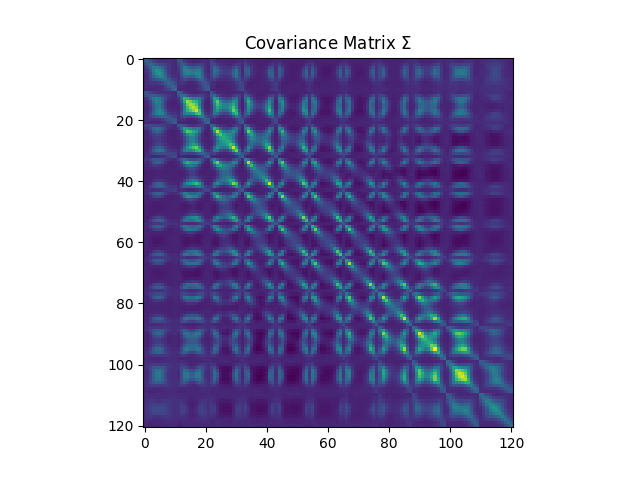

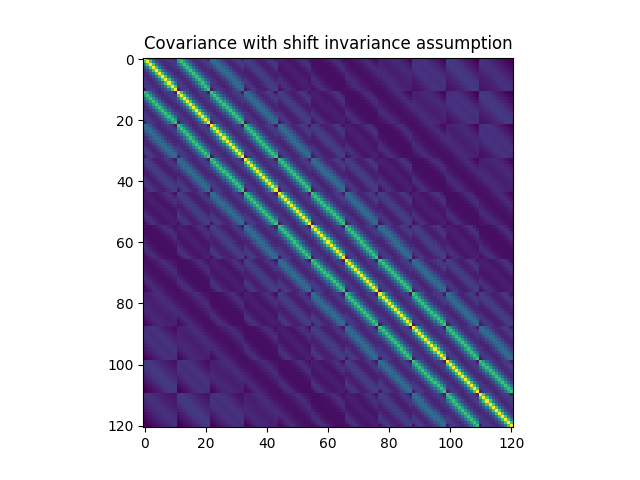

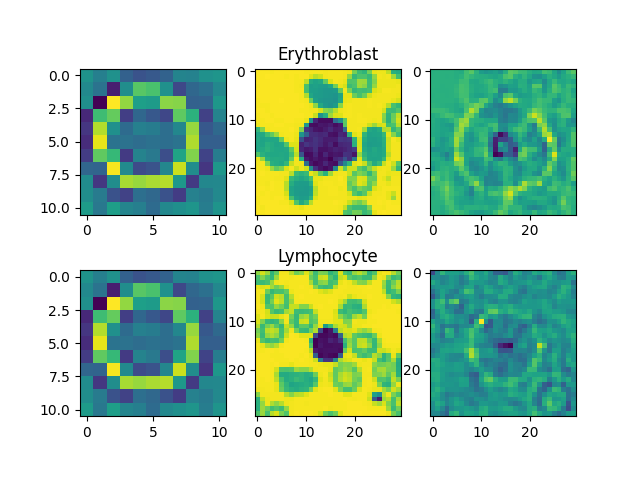

In [34]:
Istack0 = np.load('Istack0.npy')
Istack1 = np.load('Istack1.npy')
# loop through the images and calculate the mean and the mean of squares
# estimate the mean of the center, for erythroblast for class 1
# estimate the mean of the cener, for lymphocyte class 0
# also estimate mean of square of center and corner
# variance[x] = E[x^2] - E[x]^2
# we will create a filter that is smaller than the image
# here it will be 11x1
r = 5 # gives a size of 11x1

# Initialize means and covariance matrices for both classes
mu1_erythroblast = np.zeros((2*r+1, 2*r+1))  # For erythroblasts
mu0_lymphocyte = np.zeros((2*r+1, 2*r+1))  # For lymphocytes

s20_lymphocyte = np.zeros(((2*r+1)**2, (2*r+1)**2))  # For erythroblasts
s21_erythroblast = np.zeros(((2*r+1)**2, (2*r+1)**2))  # For lymphocytes

count_e= 0

for i in range(len(Istack0)):
    x = Istack0[i] / 255.0 
    
    r0 = x.shape[0] // 2
    c0 = x.shape[1] // 2
    xc = x[r0 - r:r0 + r + 1, c0 - r:c0 + r + 1]
    
    
    mu1_erythroblast += xc
    s21_erythroblast += (xc.ravel()[:, None] @ xc.ravel()[None, :])
    count_e += 1
    
count_l= 0

for i in range(len(Istack1)):
    y = Istack1[i] / 255.0
    
    r0 = y.shape[0] // 2
    c0 = y.shape[1] // 2
    xb = y[r0 - r:r0 + r + 1, c0 - r:c0 + r + 1]
    
    mu0_lymphocyte += xb
    s20_lymphocyte += (xb.ravel()[:, None] @ xb.ravel()[None, :])
    count_l += 1

mu1_erythroblast /= count_e
mu0_lymphocyte /= count_l
s20_lymphocyte /= count_l
s21_erythroblast /= count_e

    
# to calculate the common covariance
# first calculate the covariance of each class
# Var[x] = E[x^2] - E[x]^2
# but, we replace "squared" with column-row products, because we look at covariance not variance
Sigma0_lymphocyte = s20_lymphocyte - (mu0_lymphocyte.ravel()[:, None] @ mu0_lymphocyte.ravel()[None, :])
Sigma1_erythroblast = s21_erythroblast - (mu1_erythroblast.ravel()[:, None] @ mu1_erythroblast.ravel()[None, :])
# then we combine them into a common covariance matrix
# here we have exactly the same number of samples in each class
# so just average them (add up and divide by 2)
Sigma = (Sigma0_lymphocyte + Sigma1_erythroblast) / 2

fig,ax = plt.subplots()
ax.imshow(Sigma)
ax.set_title('Covariance Matrix $\Sigma$')

# let's find the displacement for entry in our covariance matrix
# every component of Sigma corresponds to a pair (row0,row1,col0,col1)
Rows,Cols = np.meshgrid(np.arange(2*r+1),np.arange(2*r+1),indexing='ij')
ROWS0 = Rows.ravel()[:,None]@np.ones_like(Rows.ravel())[None,:]
ROWS1 = np.ones_like(Rows.ravel()[:,None])@Rows.ravel()[None,:]
Drows = ROWS0 - ROWS1 # displacement between rows at every entry in our covariance

COLS0 = Cols.ravel()[:,None]@np.ones_like(Cols.ravel())[None,:]
COLS1 = np.ones_like(Cols.ravel()[:,None])@Cols.ravel()[None,:]
Dcols = COLS0 - COLS1 # displacement between columns at every entry in our covariance matrix

# stack all these together, and find the unique ones
displacements = np.unique(np.stack((Drows,Dcols)).reshape(2,-1),axis=(-1))

# initialize a new shift invariant covariance matrix
S2disp = np.zeros_like(Sigma)
count = 0
for d in displacements.T: # loop through the unique displacements
    # find the indices in our covariance matrix that correspond to this unique displacement
    ind = (Drows==d[0])*(Dcols==d[1])
    #print(np.sum(ind))
    # take all the elements of the original covariance matrix that correspond to this displacement
    # and average them all together
    # assign the same constant value to all these indices in our new covariance matrix
    S2disp[ind] = np.mean(Sigma[ind])
    
fig,ax = plt.subplots()    
ax.imshow(S2disp)
ax.set_title(f'Covariance with shift invariance assumption')
    
# how about distance
# maybe our covariance is rotationally invariant and not just shift invariant
d2sall = Drows**2+Dcols**2 # displacments are converted to square distances
d2s = np.unique(d2sall) # find all the unique values
S2dist = np.zeros_like(Sigma)
for d in d2s:
    # find all the indices that correspond to this unique value
    ind = d2sall==d
    # average across these indices, and assign the same constant value to our new covariance matrix
    S2dist[ind] = np.mean(Sigma[ind])

# now let's see the performance
# start with a circle template
x = np.arange(-r,r+1) 
X = np.meshgrid(x,x,indexing='ij')
ind = 4 # chose the 0th image in our stack to apply our filter

# use our rotationally invariant covariance matrix
# Compute the optimal filter
h_erythroblast_lymphocyte = np.linalg.solve(S2disp, (mu1_erythroblast - mu0_lymphocyte).ravel()).reshape(mu1_erythroblast.shape)
response_erythroblast = convolve(Istack0[ind] / 255.0, h_erythroblast_lymphocyte[::-1, ::-1])
response_lymphocyte = convolve(Istack1[ind] / 255.0, h_erythroblast_lymphocyte[::-1, ::-1])
fig,ax = plt.subplots(2,3)
ax[0, 0].imshow(h_erythroblast_lymphocyte)
ax[0, 1].imshow(Istack0[ind])
ax[0, 2].imshow(response_erythroblast)
ax[0,1].set_title("Erythroblast")

ax[1, 0].imshow(h_erythroblast_lymphocyte)
ax[1 ,1].imshow(Istack1[ind])
ax[1, 2].imshow(response_lymphocyte)
ax[1,1].set_title("Lymphocyte")

The cell in the center looks to have a more distinct dark center and a ring indicating the edge of the cell, while the red blood cells, while still revealing their shape, has a less pronounced color distinction.  Because this method does not differentiate the cells with the background, this is to be expected as the noise of the background is not considered in the template.